In [211]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [212]:
birth_data = pd.read_csv("birth-rate.csv")

state_crime_data = pd.read_csv('crimeratesbystate-formatted.csv')

edu_data = pd.read_csv('education.csv')

tabn084_data = pd.read_excel('tabn084.xls', skip_rows = 2, skipfooter = 6)

In [213]:
#tabn084_data  = tabn084_data.drop([2, 3,4])
#tabn084_data.head(20)

In [214]:
#tabn084_data.iloc[:, 0:10] 

In [215]:
#tabn084_data.iloc[:,11:] 

In [216]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

states = {
        'AK': 'O',
        'AL': 'S',
        'AR': 'S',
        'AS': 'O',
        'AZ': 'W',
        'CA': 'W',
        'CO': 'W',
        'CT': 'N',
        'DC': 'N',
        'DE': 'N',
        'FL': 'S',
        'GA': 'S',
        'GU': 'O',
        'HI': 'O',
        'IA': 'M',
        'ID': 'W',
        'IL': 'M',
        'IN': 'M',
        'KS': 'M',
        'KY': 'S',
        'LA': 'S',
        'MA': 'N',
        'MD': 'N',
        'ME': 'N',
        'MI': 'W',
        'MN': 'M',
        'MO': 'M',
        'MP': 'O',
        'MS': 'S',
        'MT': 'W',
        'NA': 'O',
        'NC': 'S',
        'ND': 'M',
        'NE': 'W',
        'NH': 'N',
        'NJ': 'N',
        'NM': 'W',
        'NV': 'W',
        'NY': 'N',
        'OH': 'M',
        'OK': 'S',
        'OR': 'W',
        'PA': 'N',
        'PR': 'O',
        'RI': 'N',
        'SC': 'S',
        'SD': 'M',
        'TN': 'S',
        'TX': 'S',
        'UT': 'W',
        'VA': 'S',
        'VI': 'O',
        'VT': 'N',
        'WA': 'W',
        'WI': 'M',
        'WV': 'S',
        'WY': 'W'
}

In [217]:
state_crime_data = state_crime_data.drop([0])
state_crime_data = state_crime_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
state_crime_data['State_Abbrev'] = state_crime_data['state'].map(us_state_abbrev)
state_crime_data['State_Region'] = state_crime_data['State_Abbrev'].map(states)
state_crime_data.to_csv('state_crime_data.csv')
state_crime_data.head()

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,State_Abbrev,State_Region
1,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,AL,S
2,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,AK,O
3,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,AZ,W
4,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,AR,S
5,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,CA,W


In [64]:
edu_data = edu_data.drop([0])
edu_data.head()

,state,reading,math,writing,percent_graduates_sat,pupil_staff_ratio,dropout_rate
1,Alabama,557,552,549,7,6.7,2.3
2,Alaska,520,516,492,46,7.9,7.3
3,Arizona,516,521,497,26,10.4,7.6
4,Arkansas,572,572,556,5,6.8,4.6
5,California,500,513,498,49,10.9,5.5


In [113]:
birth_data.head()

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Aruba,36.400,35.179,33.863,32.459,30.994,29.513,28.069,26.721,25.518,...,15.024,14.528,14.041,13.579,13.153,12.772,12.441,12.159,11.919,11.716
1,Afghanistan,52.201,52.206,52.208,52.204,52.192,52.168,52.130,52.076,52.006,...,51.229,50.903,50.486,49.984,49.416,48.803,48.177,47.575,47.023,46.538
2,Angola,54.432,54.394,54.317,54.199,54.040,53.836,53.585,53.296,52.984,...,48.662,48.355,48.005,47.545,46.936,46.184,45.330,44.444,43.607,42.875
3,Albania,40.886,40.312,39.604,38.792,37.913,37.008,36.112,35.245,34.421,...,17.713,16.850,16.081,15.444,14.962,14.644,14.485,14.464,14.534,14.649
4,Netherlands Antilles,32.321,30.987,29.618,28.229,26.849,25.518,24.280,23.173,22.230,...,15.809,15.412,15.096,14.824,14.565,14.309,14.051,13.790,13.532,13.281


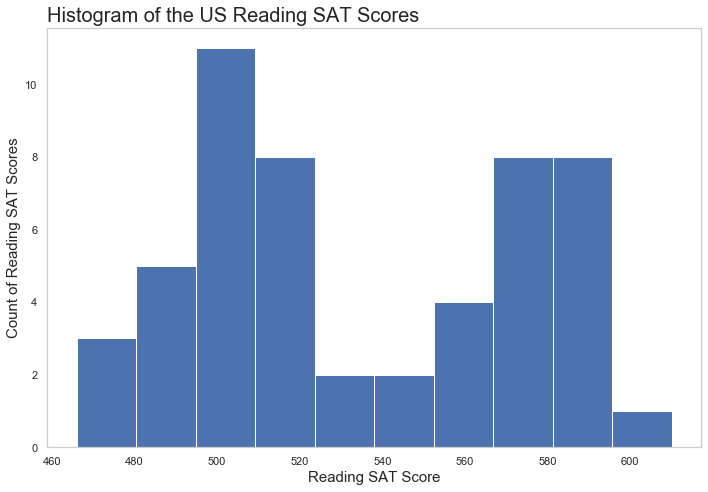

In [205]:
# Creating histogram 
fig, ax = plt.subplots(figsize =(10, 7), tight_layout = True) 
ax.hist(edu_data['reading']) 
plt.grid(b=None)
plt.xlabel('Reading SAT Score', fontsize = 15)
plt.ylabel('Count of Reading SAT Scores', fontsize = 15)
plt.title(r'Histogram of the US Reading SAT Scores', fontsize = 20, loc = "left")
plt.savefig('hist.png')
# Show plot 
plt.show()

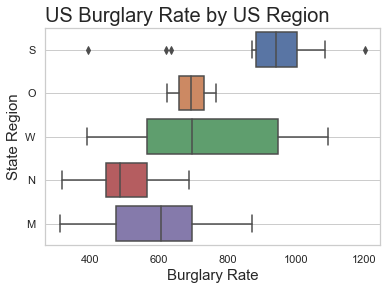

In [218]:
ax = sns.boxplot(x=state_crime_data['burglary'], y=state_crime_data['State_Region'])
ax.set_xlabel('Burglary Rate', fontsize = 15)
ax.set_ylabel('State Region', fontsize = 15)
ax.set_title('US Burglary Rate by US Region', fontsize = 20, loc = "left")
plt.grid(b=None)
plt.savefig('boxplot.png')

In [149]:
read_mean = int(edu_data['reading'].mean())
math_mean = int(edu_data['math'].mean())
writing_mean = int(edu_data['writing'].mean())

read_min = int(edu_data['reading'].min())
math_min = int(edu_data['math'].min())
writing_min = int(edu_data['writing'].min())

read_max = int(edu_data['reading'].max())
math_max = int(edu_data['math'].max())
writing_max = int(edu_data['writing'].max())

max_values = [read_max,math_max,writing_max]
min_values = [read_min,math_min,writing_min]

nc_data = edu_data[edu_data['state'] == 'North Carolina']
nc_reading = nc_data.iloc[0]['reading']
nc_math = nc_data.iloc[0]['math']
nc_writing = nc_data.iloc[0]['writing']

In [209]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number+gauge+delta", value = nc_reading,
    delta = {'reference': read_mean},
    domain = {'x': [0.25, 1], 'y': [0.08, 0.25]},
    title = {'text': "<b>Reading</b>"},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, max(max_values)]},
        'threshold': {
            'line': {'color': "red", 'width': 2},
            'thickness': 0.75,
            'value': read_mean},
        'steps': [
            {'range': [0, read_min], 'color': "lightgray"}],
        'bar': {'color': "black"}}))

fig.add_trace(go.Indicator(
    mode = "number+gauge+delta", value = nc_math,
    delta = {'reference': math_mean},
    domain = {'x': [0.25, 1], 'y': [0.4, 0.6]},
    title = {'text': "<b>Math</b>"},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, max(max_values)]},
        'threshold': {
            'line': {'color': "red", 'width': 2},
            'thickness': 0.75,
            'value': math_mean},
        'steps': [{'range': [0, math_min], 'color': "lightgray"}],
        'bar': {'color': "black"}}))

fig.add_trace(go.Indicator(
    mode = "number+gauge+delta", value = nc_writing,
    delta = {'reference': writing_mean},
    domain = {'x': [0.25, 1], 'y': [0.7, 0.9]},
    title = {'text' :"<b>Writing</b>"},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, max(max_values)]},
        'threshold': {
            'line': {'color': "red", 'width': 2},
            'thickness': 0.75,
            'value': writing_mean},
        'steps': [{'range': [0, writing_min], 'color': "lightgray"}],
        'bar': {'color': "black"}}))
fig.update_layout(height = 400, margin = {'t':35,'b':0, 'l':0},
                  title="North Carolina SAT Test Scores",font_size=16)

fig.show()

<Figure size 432x288 with 0 Axes>